## Домашнее задание к лекции «Задачи классификации и кластеризации»

### Задание.

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [47]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [48]:
# Загружаем набор данных Ирисы:
iris = load_iris()

In [49]:
# выведем полное описание dataset

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [50]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)

# Цедевая переменная
variety = iris.target

In [51]:
# выводим DF, убедиться что все ок
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [52]:
# Целевая переменная 0 — Setosa, 1 — Versicolor, 2 — Virginica. (можно вывести названия с помощью: list(iris.target_names))
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
# оставляем только два признака - sepal_length и sepal_width которые есть в задании: 
iris_df = data[['sepal length (cm)','sepal width (cm)']].copy()


In [54]:
# разделяем выборку на тренировочную и тестовую

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_df, variety, random_state = 42)

In [55]:
# импортируем LDA-функционал

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [56]:
model = LinearDiscriminantAnalysis()

In [57]:
# обучаем данные

model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [58]:
model.coef_

array([[-5.83421967,  8.36880937],
       [ 1.5215595 , -3.81430503],
       [ 3.81202284, -3.79343242]])

In [59]:
model.intercept_

array([  3.35398812,   1.07579685, -13.24137777])

In [60]:
# делаем прогноз на тестовой выборке

y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0])

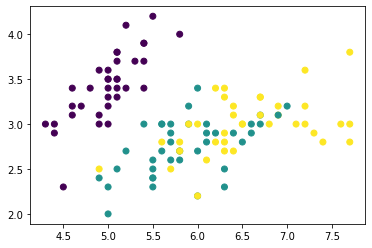

In [61]:
plt.scatter(x = X_train['sepal length (cm)'], y = X_train ['sepal width (cm)'], c = y_train)

plt.show()



In [62]:
# посмотрим на наши центроиды
model.means_

array([[4.99714286, 3.42857143],
       [5.88717949, 2.75128205],
       [6.53947368, 2.97894737]])

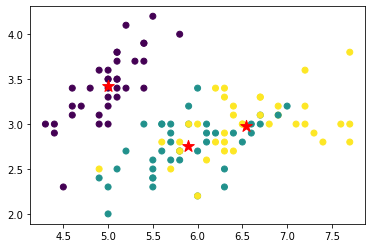

In [63]:
plt.scatter(x = X_train['sepal length (cm)'], y = X_train ['sepal width (cm)'], c = y_train)
# центроиды
plt.scatter(model.means_[:, 0], model.means_[:, 1], c='r', s=150, marker='*')

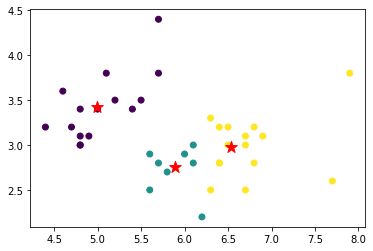

In [64]:
# визуализация разделения на тесте
plt.scatter(x = X_test['sepal length (cm)'], y = X_test ['sepal width (cm)'], c=model.predict(X_test))
# центроиды
plt.scatter(model.means_[:, 0], model.means_[:, 1], c='r', s=150, marker='*')

In [65]:
# Проверим точность тестовой модели

accuracy_score(y_test, model.predict(X_test)) # показывает сколько раз наша моджель ошиблась. отношение правильных ко всем. чем ближе к 1 тем точнее

0.868421052631579

Из выше полученных данных видно, что точки двух разных целевых переменнных (разные сорты цвевтов) очень сильно перемешаны, 
по таким данным sepal width (cm) и sepal length (cm) хорощую классификацию не получить.
Так же мало данных для хорошей модели.

In [66]:
# Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [67]:
X_train, X_test, y_train, y_test = train_test_split(iris_df, variety, test_size = 0.3, random_state = 0)
model_cl = KMeans(n_clusters = 3)
model_cl.fit(X_train)
# model_predictions = model_cl.predict(X_test)
# model_predictions

KMeans(n_clusters=3)

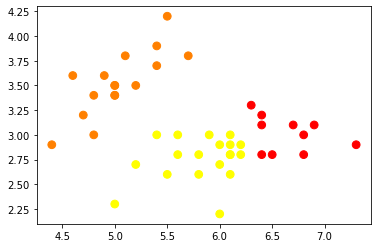

In [68]:
clusters = model_cl.fit_predict(X_test)
plt.scatter(x = X_test['sepal length (cm)'], y = X_test ['sepal width (cm)'], cmap = 'autumn', c = clusters, s = 60)